# Введение в итераторы 

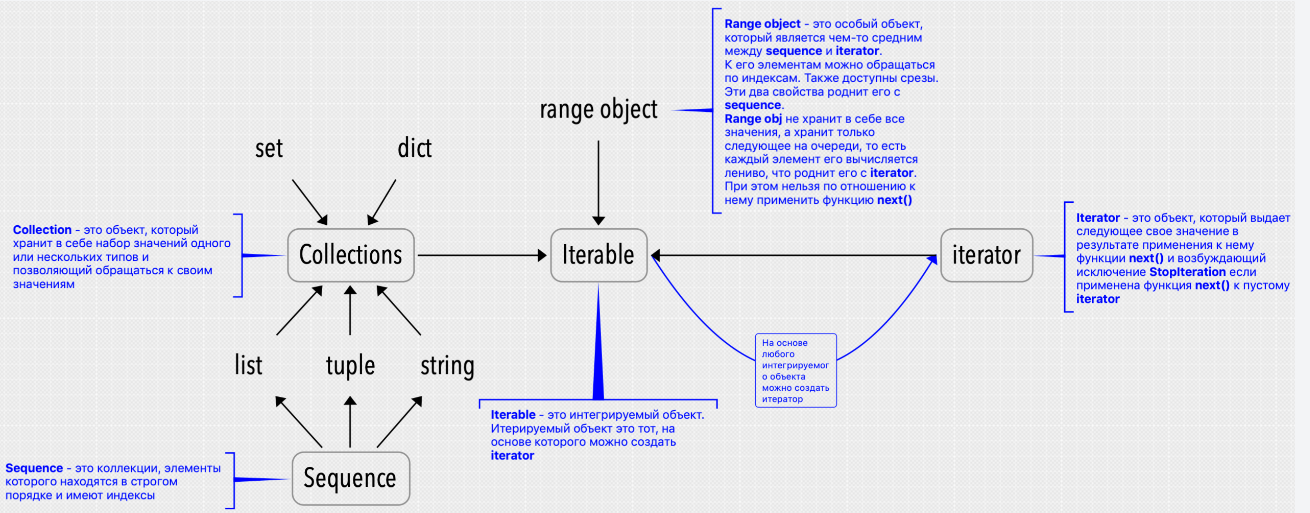

### Итерируемые объекты

In [2]:
numbers = [17,20,25]  # последовательность (список)
numbers, type(numbers)

([17, 20, 25], list)

In [3]:
for n in numbers:    # итерируем по списку, перебирая каждый элемент
    print(n)

17
20
25


In [4]:
25 in numbers       # неявно итерируемся 

True

In [5]:
for i in range(1,100000000000000000000000000000):  # range объект
    if i==10:
        break
    else:
        print(i, end=' ')

1 2 3 4 5 6 7 8 9 

*В языке Python под итерируемым объектом подразумевают объект, который можно итерировать, то есть проходиться по нему, перебирая каждый элемент раз за разом.*

### Итераторы

Итератор — специальный объект, который выдает свои элементы по одному за раз.

In [9]:
iterator_numbers = iter(numbers)   # итератор на основе списка
iterator_numbers, type(iterator_numbers)

(<list_iterator at 0x26294fb8130>, list_iterator)

In [10]:
print(*iterator_numbers)   # первый раз прошлись итераторам и распаковали 

17 20 25


In [11]:
print(*iterator_numbers)   # второй раз уже пройтись нельзя! итератор пуст

In [12]:
iterator_numbers = iter(numbers)   # итератор на основе списка

In [13]:
print(next(iterator_numbers))

17


In [14]:
print(next(iterator_numbers))

20


In [15]:
print(next(iterator_numbers))

25


In [16]:
print(next(iterator_numbers))  # ошибка (StopIteration)

StopIteration: 

In [17]:
next(iterator_numbers,'значение вместо исключения')

'значение вместо исключения'

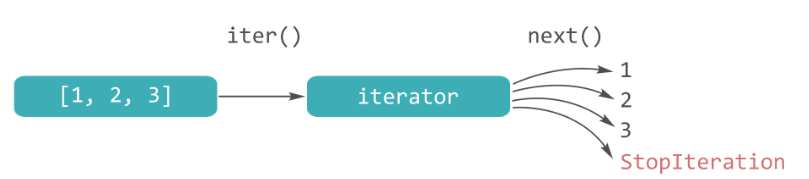

**Основными преимуществами использования итераторов являются:**

- однотипность работы с объектами разных типов
- ленивые вычисления и экономия потребляемой памяти
- комбинация множества итераторов для создания понятной и читабельной программы

In [18]:
numbers = [10,20,30,5]

In [19]:
iterator_map = map(lambda x: x**2, numbers) # итератор
iterator_map

In [20]:
#next(iterator_map)

In [21]:
# итератор можно пройти циклом for
for i in iterator_map:
    print(i)

100
400
900
25


In [22]:
iterator_map = map(lambda x: x**2, numbers) # итератор
iterator_map

# итератор можно преобразовать в коллекцию
a = list(iterator_map)
print(a)

[100, 400, 900, 25]


In [23]:
iterator_map = map(lambda x: x**2, numbers) # итератор
print(*iterator_map) # опустошили итератор

iterator_map = map(lambda x: x**2, numbers) # заполняем итератор заново

100 400 900 25


In [24]:
# в итераторе можно проверить вхождение
print(900 in iterator_map)

print(next(iterator_map)) # следующие сохраняться

# next(iterator_map) тут уже ошибка

True
25


### Протокол итерируемых объектов и итераторов

*Магические методы в Python это специальные методы, вызываемые автоматически встроенными функциями и операторами. Они обрамляются двойным нижним подчеркиванием с обеих сторон.*

In [25]:
numbers = [10,20,30,40,50]
numbers

[10, 20, 30, 40, 50]

In [26]:
numbers.__len__ # магический метод

<method-wrapper '__len__' of list object at 0x000002629500C780>

In [27]:
numbers.__len__() # его можно вызвать, что равносильно len(numbers)

5

In [28]:
# таких методов у объекта Python много
print(numbers.__dir__())

['__repr__', '__hash__', '__getattribute__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__iter__', '__init__', '__len__', '__getitem__', '__setitem__', '__delitem__', '__add__', '__mul__', '__rmul__', '__contains__', '__iadd__', '__imul__', '__new__', '__reversed__', '__sizeof__', 'clear', 'copy', 'append', 'insert', 'extend', 'pop', 'remove', 'index', 'count', 'reverse', 'sort', '__class_getitem__', '__doc__', '__str__', '__setattr__', '__delattr__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__format__', '__dir__', '__class__']


Итерируемые объекты в Python обладают магическим методом __ iter __(), который преобразует их в итератор. Итераторы, в свою очередь, имеют метод __ next __ (), который предоставляет следующий элемент последовательности. Встроенные функции iter() и next() вызывают эти методы автоматически. 

Итераторы также обладают методом __ iter __(), который возвращает самого себя. Такая структура обеспечивает совместимость с циклами for, которые ожидают наличие обоих методов. Итераторы могут также рассматриваться как подтипы итерируемых объектов, так как они поддерживают метод __ iter __().

In [29]:
numbers # итерируемый объект

[10, 20, 30, 40, 50]

In [30]:
iterator_numbers = numbers.__iter__() # итератор на основе списка 
print(*iterator_numbers)

iterator_numbers = numbers.__iter__()
iterator_numbers

10 20 30 40 50


In [31]:
iterator_numbers.__iter__()  # возвращает сам себя (для совместимости в циклах for)

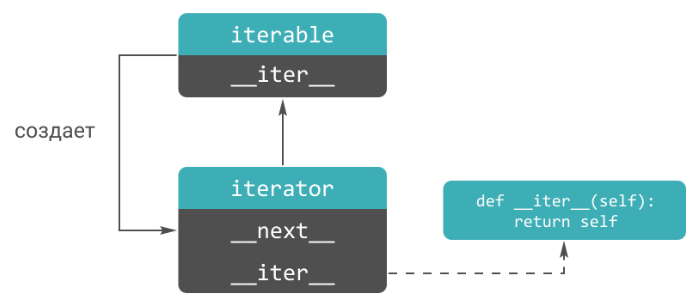

In [ ]:
# iter(iterable) -> iterator

In [ ]:
# iter(callable, sentinel) -> iterator

# callable - функция
# sentinel - стоп значение, до которого итератор будет вызывать функцию callable

In [32]:
import numpy as np

In [33]:
def generate_random():
    return np.random.choice([1,2,3,4,5,6,7,8,9,10])

In [37]:
random_iterator = iter(generate_random, 10)

for i in random_iterator:
    print('Не 10!')
else:
    print('ура! 10')

Не 10!
Не 10!
Не 10!
Не 10!
Не 10!
Не 10!
Не 10!
Не 10!
Не 10!
ура! 10


In [38]:
random_iterator = iter(generate_random, 10)

while True:
    x = (next(random_iterator,10))
    print(x)
    if x==10:
        print('10 нашлась!')
        break

2
3
4
5
4
1
9
7
10
10 нашлась!


*Итерируемый объект (iterable) и итератор (iterator) – это протоколы, правила*

### Создание собственных итераторов

Чтобы создать собственный итератор в Python, нужно определить класс, который реализует два метода: __ iter__()  и  __ next__().

In [39]:
# Итератор по заданному диапазону

In [40]:
class MyIterator:  # создаём класс
    
    def __init__(self,begin,end):  # инициализация класса (вызывается единожды при создании объекта)
        # создание атрибутов
        self.begin = begin 
        self.end = end
    
    def __iter__(self):  # для совместимости по протоколу
        return self
    
    def __next__(self):
        if self.begin < self.end:
            self.begin += 1
            return self.begin-1
        else:
            raise StopIteration

In [41]:
iterator1 = MyIterator(20,25)
print(*iterator1)

20 21 22 23 24


In [42]:
iterator1 = MyIterator(20,25)
for i in iterator1:
    print(i)

20
21
22
23
24


In [ ]:
# итератор по чётным числам, начиная с begin

In [43]:
class EvenNumbers:                             
    def __init__(self, begin):                
        self.begin = begin +  begin % 2
    
    def __iter__(self):
        return self
    
    def __next__(self):
        value  = self.begin
        self.begin += 2
        return value

In [44]:
even_iterator = EvenNumbers(101)
for i, next_even in enumerate(even_iterator):
    if i>5:
        break
    else:
        print(next_even)

102
104
106
108
110
112


In [45]:
# итератор по списку, умножающий элементы на заданное число k

In [47]:
class DoubleIteration:
    
    def __init__(self,my_list, k=2):
        self.my_list = my_list
        self.k = k
        self.index = -1  # для отслеживания текущего индекса
        
    def __iter__(self):
        return self
    
    def __next__(self):
        self.index += 1   # первый вызов инлекс == 0, тк начало списка
        if self.index >= len(self.my_list):
            raise StopIteration
        else:
            return self.my_list[self.index]*self.k

iterator_numbers = DoubleIteration([10,20,30,40,50],11)  # k=11

print(*iterator_numbers)

110 220 330 440 550


In [48]:
iterator_double = DoubleIteration([1,10,11,20,50])

In [49]:
print(*iterator_double)

2 20 22 40 100
